# Explanation module for AI Got Hands

## 1. Setting up FightingICE environment and loading agent

In [199]:
import gym
import gym_fightingice
import random

env = gym.make("FightingiceDataFrameskip-v0", java_env_path="",port=4242, freq_restart_java=10, show_training=True)

# SAMPLE RUN OF FIGHTINGICE
# Uncomment if you want to check whether the environment
# is working properly; it should launch a Java window
# showing two AI fighting each other (after some loading time).
# obs = env.reset(p2="BCP")
# while True:
# 	obs = env.reset(p2="BCP")
# 	done = False
# 	while not done:
# 		new_obs, reward, done, _ = env.step(random.randint(0,55))

Please make sure you can run java if you see some error


In [200]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor

In [203]:
class IceProcessor(Processor):
    def process_observation(self, observation):
        if len(observation) == 4:
            new_obs, reward, done, _ = observation
        else:
            new_obs = observation
        return new_obs

    def process_state_batch(self, batch):
        processed_batch = batch
        return processed_batch

    def process_reward(self, reward):
        return reward
    
processor = IceProcessor()

# Function to build NN
def build_model(states, actions):
    model = tensorflow.keras.Sequential()
    model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(actions,activation='linear'))
    return model

states = env.observation_space.shape[0]
actions = env.action_space.n
model = build_model(states, actions)
model.summary()

def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=100000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  processor=processor, nb_actions=actions, nb_steps_warmup=100, target_model_update=1e-2)
    return dqn

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3),metrics=['mae'])
dqn.load_weights("aigh-dqn-v5.h5")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               14500     
_________________________________________________________________
dense_9 (Dense)              (None, 56)                5656      
Total params: 20,156
Trainable params: 20,156
Non-trainable params: 0
_________________________________________________________________


## 2. Running agent tests to collect action data

In [9]:
bcp_data = []

num_matches = 10
opponent_name = "BCP"

for n in range(num_matches):
    new_obs = env.reset(p2=opponent_name)
    done = False
    while not done:
        if len(new_obs) == 144:
            # Model decides action based on state
            current_action = dqn.forward(new_obs)
            # Append action-state tuple to appropriate array
            bcp_data.append((current_action, new_obs))
            new_obs, reward, done, _ = env.step(current_action)
        else:
            # Catch case due to inconsistencies in FightingICE's observation output.
            # This pretty much only happens for 1 frame at the start of a round, so does not
            # interfere significantly with data integrity
            new_obs, reward, done, _ = env.step(random.randint(0,55))

Start java env in  and port 4242
send round end to <multiprocessing.connection.Connection object at 0x142ab7730>
send round end to <multiprocessing.connection.Connection object at 0x142ab7730>
send round end to <multiprocessing.connection.Connection object at 0x142ab7730>
send round end to <multiprocessing.connection.Connection object at 0x142ab7730>
send round end to <multiprocessing.connection.Connection object at 0x142ab7730>
send round end to <multiprocessing.connection.Connection object at 0x142ab7730>
send round end to <multiprocessing.connection.Connection object at 0x142ab7730>
send round end to <multiprocessing.connection.Connection object at 0x142ab7730>
send round end to <multiprocessing.connection.Connection object at 0x142ab7730>
send round end to <multiprocessing.connection.Connection object at 0x142ab7730>


In [204]:
utal_data = []

num_matches = 10
opponent_name = "UtalFighter"

for n in range(num_matches):
    new_obs = env.reset(p2=opponent_name)
    done = False
    while not done:
        if len(new_obs) == 144:
            # Model decides action based on state
            current_action = dqn.forward(new_obs)
            # Append action-state tuple to appropriate array
            utal_data.append((current_action, new_obs))
            new_obs, reward, done, _ = env.step(current_action)
        else:
            # Catch case due to inconsistencies in FightingICE's observation output.
            # This pretty much only happens for 1 frame at the start of a round, so does not
            # interfere significantly with data integrity
            new_obs, reward, done, _ = env.step(random.randint(0,55))

Start java env in  and port 4242
send round end to <multiprocessing.connection.Connection object at 0x1499c82b0>
send round end to <multiprocessing.connection.Connection object at 0x1499c82b0>
send round end to <multiprocessing.connection.Connection object at 0x1499c82b0>


ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/co

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:4242)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-f7bdbe0ce68d>", line 7, in <module>
    new_obs = env.reset(p2=opponent_name)
  File "/Users/matthewvarona/eclipse-workspace/FightingICE/Gym-FightingICE-master/gym_fightingice/envs/fightingice_env_data_frameskip.py", line 200, in reset
    obs = self.pipe.recv()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Pyth

Please IGNORE the Exception above because of restart java game


KeyboardInterrupt: 

In [205]:
machete_data = []

num_matches = 10

for n in range(num_matches):
    new_obs = env.reset()
    done = False
    while not done:
        if len(new_obs) == 144:
            # Model decides action based on state
            current_action = dqn.forward(new_obs)
            # Append action-state tuple to appropriate array
#             machete_data.append((current_action, new_obs))
            new_obs, reward, done, _ = env.step(current_action)
        else:
            # Catch case due to inconsistencies in FightingICE's observation output.
            # This pretty much only happens for 1 frame at the start of a round, so does not
            # interfere significantly with data integrity
            new_obs, reward, done, _ = env.step(random.randint(0,55))

Start java env in  and port 4242
send round end to <multiprocessing.connection.Connection object at 0x149a528b0>
0
190
1426
send round end to <multiprocessing.connection.Connection object at 0x149a528b0>
0
235
1420
send round end to <multiprocessing.connection.Connection object at 0x149a528b0>
0
235
1420
send round end to <multiprocessing.connection.Connection object at 0x149a528b0>
0
190
1426
send round end to <multiprocessing.connection.Connection object at 0x149a528b0>
0
235
1420


KeyboardInterrupt: 

In [16]:
with open("bcp_vs_data.csv", 'w') as file:
    for step in bcp_data:
        line = str(step[0])
        for param in step[1]:
            line += "," + str(param)
        file.write(line + "\n")
        
with open("machete_vs_data.csv", 'w') as file:
    for step in machete_data:
        line = str(step[0])
        for param in step[1]:
            line += "," + str(param)
        file.write(line + "\n")
        
with open("utal_vs_data.csv", 'w') as file:
    for step in utal_data:
        line = str(step[0])
        for param in step[1]:
            line += "," + str(param)
        file.write(line + "\n")

## 3. Analyzing match data

Key parameter indices:
* 0 - my HP
* 3 - my X
* 66 - opp HP
* 143 - Distance between players

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

In [24]:
all_data = []

for step in utal_data:
    entry = [step[0]]
    for param in step[1]:
        entry.append(param)
    all_data.append(entry)
    
for step in bcp_data:
    entry = [step[0]]
    for param in step[1]:
        entry.append(param)
    all_data.append(entry)
    
for step in machete_data:
    entry = [step[0]]
    for param in step[1]:
        entry.append(param)
    all_data.append(entry)

In [115]:
all_df = pd.DataFrame(all_data)

In [33]:
move_txt = "AIR AIR_A AIR_B AIR_D_DB_BA AIR_D_DB_BB AIR_D_DF_FA AIR_D_DF_FB AIR_DA AIR_DB AIR_F_D_DFA AIR_F_D_DFB AIR_FA AIR_FB AIR_GUARD AIR_GUARD_RECOV AIR_RECOV AIR_UA AIR_UB BACK_JUMP BACK_STEP CHANGE_DOWN CROUCH CROUCH_A CROUCH_B CROUCH_FA CROUCH_FB CROUCH_GUARD CROUCH_GUARD_RECOV CROUCH_RECOV DASH DOWN FOR_JUMP FORWARD_WALK JUMP LANDING NEUTRAL RISE STAND STAND_A STAND_B STAND_D_DB_BA STAND_D_DB_BB STAND_D_DF_FA STAND_D_DF_FB STAND_D_DF_FC STAND_F_D_DFA STAND_F_D_DFB STAND_FA STAND_FB STAND_GUARD STAND_GUARD_RECOV STAND_RECOV THROW_A THROW_B THROW_HIT THROW_SUFFER"
move_list = move_txt.split(' ')

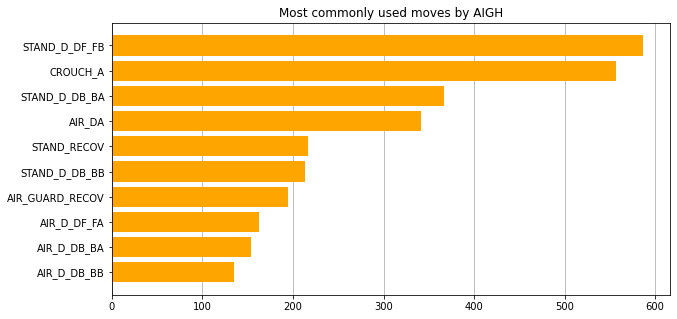

In [88]:
top10_moves = all_df[0].value_counts()[:10]
top10_names = []
for movenum in top10_moves.keys():
    top10_names.append(move_list[movenum])
    
y_pos = np.arange(10)
    
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.grid(axis='x')
ax.set_axisbelow(True)
ax.barh(y_pos, top10_moves, color='orange', align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(top10_names)

ax.set_title("Most commonly used moves by AIGH")
ax.invert_yaxis()

In [145]:
move_hps = np.zeros(56)
move_counts = all_df[0].value_counts()

for x in all_data:
    move_hps[x[0]] += x[1]
    
for index, val in enumerate(move_hps):
    if index in move_counts.keys():
        move_hps[index] /= move_counts[index]
        
move_hp_df = pd.DataFrame(move_hps)
move_hp_df = move_hp_df.sort_values(by=0, ascending=False)
sorted_names = []
for x in move_hp_df.index:
    sorted_names.append(move_list[x])

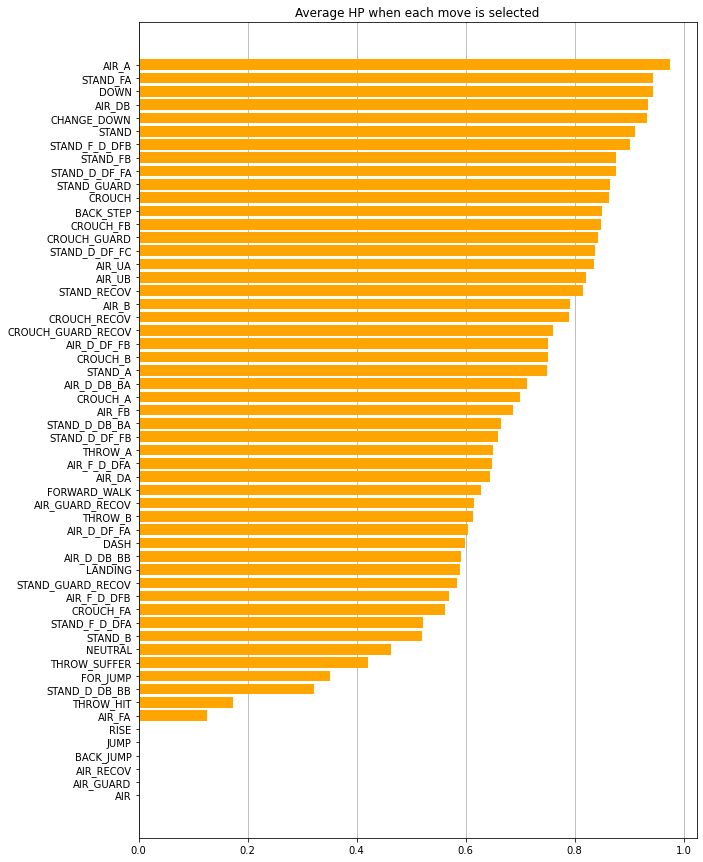

In [146]:
fig, ax = plt.subplots(1,1,figsize=(10,15))

y_pos = np.arange(len(move_hps))
ax.grid(axis='x')
ax.set_axisbelow(True)
ax.barh(y_pos, move_hp_df[0], color='orange', align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_names)

ax.set_title("Average HP when each move is selected")
ax.invert_yaxis()

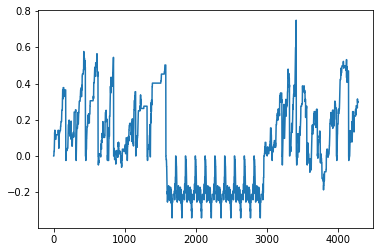

In [158]:
hp_diffs = all_df[1] - all_df[66]
plt.plot(hp_diffs)

In [167]:
move_hp_diffs = np.zeros(56)
move_counts = all_df[0].value_counts()

for x in all_data:
    move_hp_diffs[x[0]] += x[1] - x[66]
    
for index, val in enumerate(move_hp_diffs):
    if index in move_counts.keys():
        move_hp_diffs[index] /= move_counts[index]
        
move_hpdiffs_df = pd.DataFrame(move_hp_diffs)
move_hpdiffs_df = move_hpdiffs_df.sort_values(by=0, ascending=True)
sorted_names = []
for x in move_hpdiffs_df.index:
    sorted_names.append(move_list[x])

Text(0.5, 1.0, 'Average HP advantage of AIGH when each move is selected')

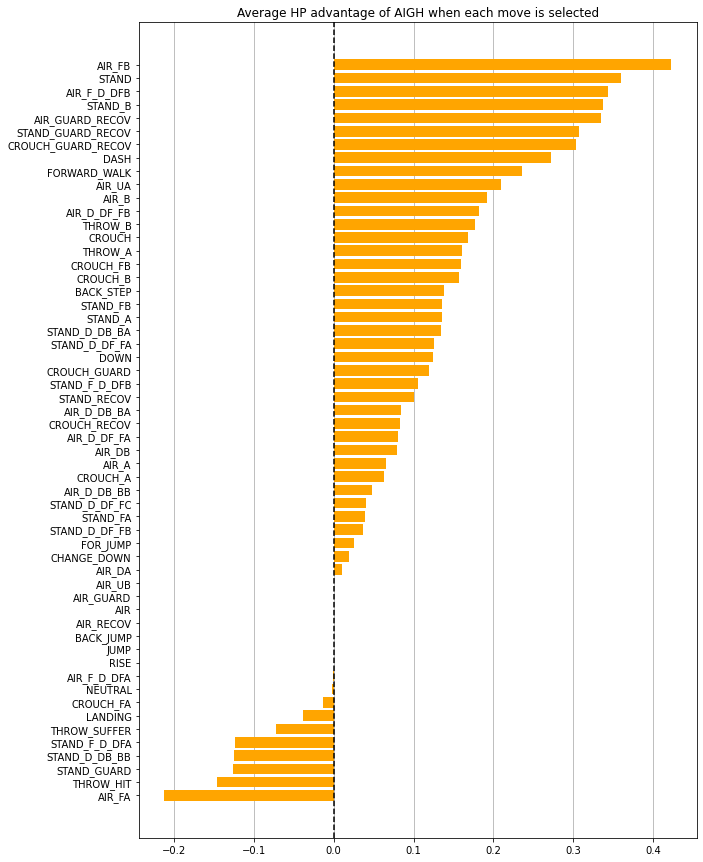

In [173]:
fig, ax = plt.subplots(1,1,figsize=(10,15))

y_pos = np.arange(len(move_hpdiffs_df))
ax.grid(axis='x')
ax.set_axisbelow(True)
ax.barh(y_pos, move_hpdiffs_df[0], color='orange', align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_names)
ax.axvline(x=0, c="k", linestyle="--")
ax.set_title("Average HP advantage of AIGH when each move is selected")

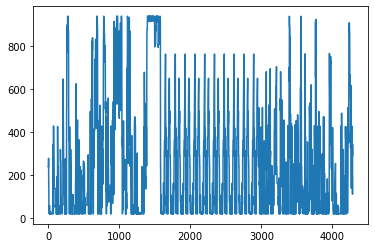

In [180]:
plt.plot(all_df[3])

In [184]:
dists_from_center = np.zeros(56)
move_counts = all_df[0].value_counts()

for step in all_data:
    # Instead of getting raw X value, we get distance from center
    dists_from_center[step[0]] += abs((step[3] * 960)-480)
    
for index, val in enumerate(dists_from_center):
    if index in move_counts.keys():
        dists_from_center[index] /= move_counts[index]
        
dists_from_center_df = pd.DataFrame(dists_from_center)
dists_from_center_df = dists_from_center_df.sort_values(by=0, ascending=True)
sorted_names = []
for x in dists_from_center_df.index:
    sorted_names.append(move_list[x])

Text(0.5, 1.0, "AIGH's average distance from center when each move is selected (top 20 moves)")

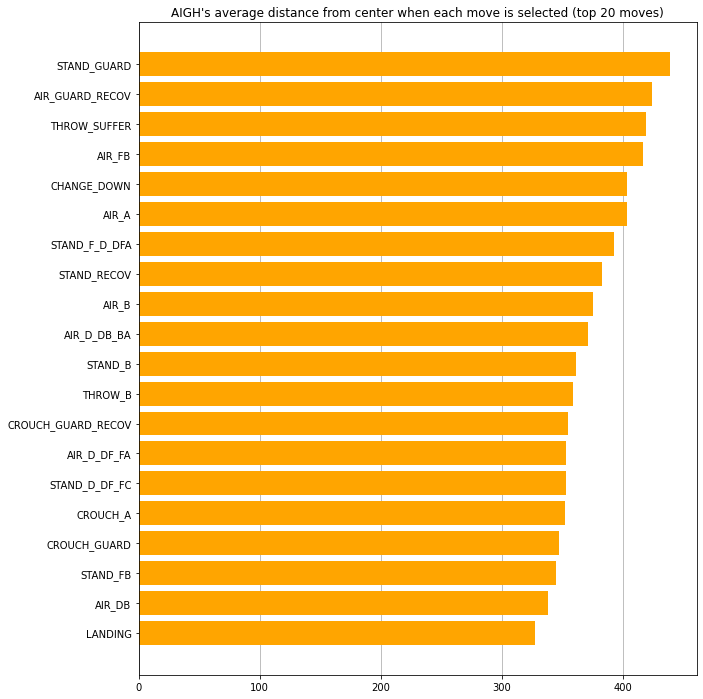

In [192]:
fig, ax = plt.subplots(1,1,figsize=(10,12))

y_pos = np.arange(len(dists_from_center_df)-36)
ax.grid(axis='x')
ax.set_axisbelow(True)
ax.barh(y_pos, dists_from_center_df[0][32:-4], color='orange', align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_names[32:-4])
ax.set_title("AIGH's average distance from center when each move is selected (top 20 moves)")

In [193]:
player_dists = np.zeros(56)
move_counts = all_df[0].value_counts()

for step in all_data:
    # Instead of getting raw X value, we get distance from center
    player_dists[step[0]] += step[144]
    
for index, val in enumerate(player_dists):
    if index in move_counts.keys():
        player_dists[index] /= move_counts[index]
        
player_dists_df = pd.DataFrame(player_dists)
player_dists_df = player_dists_df.sort_values(by=0, ascending=True)
sorted_names = []
for x in player_dists_df.index:
    sorted_names.append(move_list[x])

Text(0.5, 1.0, "AIGH's average distance from center when each move is selected (top 20 moves)")

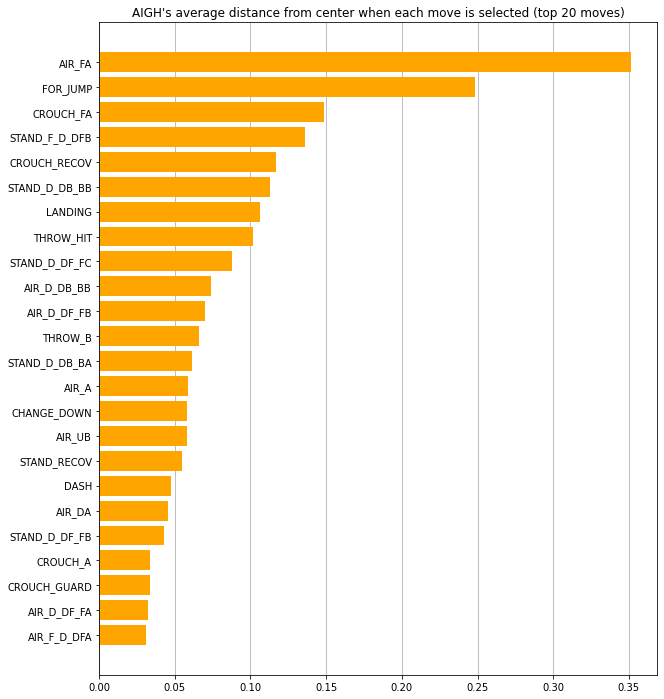

In [195]:
fig, ax = plt.subplots(1,1,figsize=(10,12))

y_pos = np.arange(len(player_dists_df)-32)
ax.grid(axis='x')
ax.set_axisbelow(True)
ax.barh(y_pos, player_dists_df[0][32:], color='orange', align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_names[32:])
ax.set_title("AIGH's average distance from center when each move is selected (top 20 moves)")